# About Dataset

### This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

## Columns:

- **Age**: This column represents the age of each employee in years. The values in this column are numeric.

- **Gender**: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

- **Education Level**: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

- **Job Title**: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

- **Years of Experience**: This column represents the number of years of work experience of each employee. The values in this column are numeric.

- **Salary**: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

In [94]:
# library we will use
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [95]:
# 1st, after importing the libraries, we will read the data
df = pd.read_csv('DataSets/Salary Data.csv')

In [96]:
# 2nd, we will see some information about the data
df.info()
# so we have 6 columns, and 375 rows
# from the first look it's seems that we have two null values in every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [97]:
# before we deal with the null values, let's assign the features and the target
# our features are all the columns except the salary column
X = df.drop(columns='Salary')
# our prediction target is the salary
y = df[['Salary']]

In [98]:
# 3rd, EDA (Exploratory Data Analysis) 
# we will start by checking the null values
print(X.isnull().sum())


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
dtype: int64


In [99]:
# our null values are relly a few so we can just drop them
X = X.dropna(subset=['Age', 'Gender', 'Job Title', 'Education Level', 'Years of Experience'])

<Axes: >

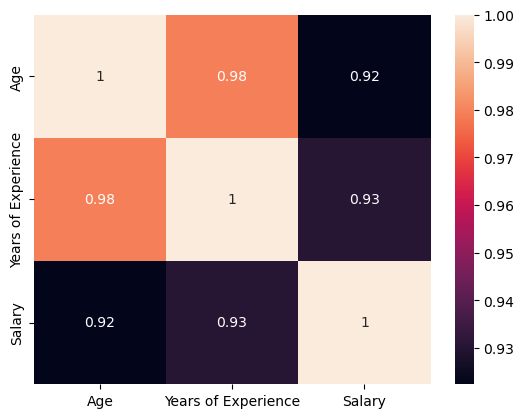

In [100]:
# 4th, we will check the correlation between the features and the target
# we will use the heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>]], dtype=object)

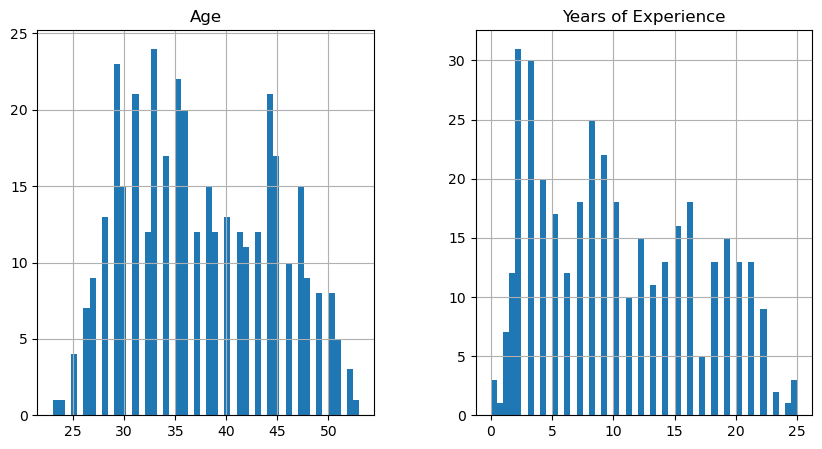

In [101]:
X.hist(bins=50, figsize=(10,5))


<Axes: >

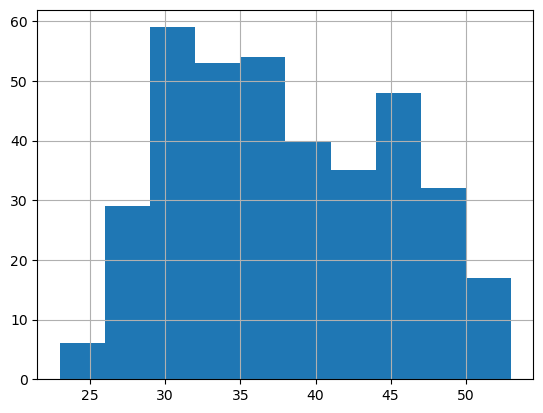

In [102]:
# Age column
X["Age"].hist()

AttributeError: 'Series' object has no attribute 'bar'

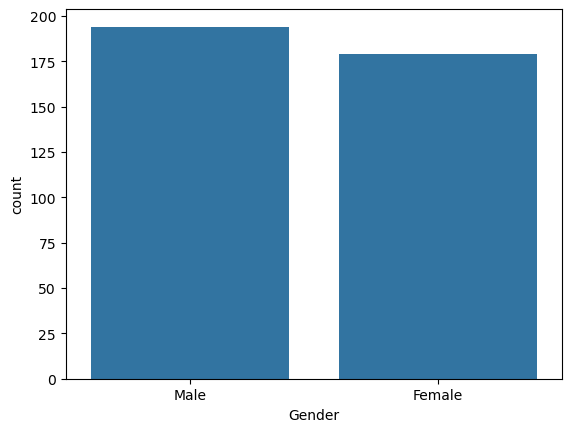

In [103]:
# Gender column
# we will use the countplot
sns.countplot(data=X, x="Gender")
X["Gender"].value_counts().bar()

In [104]:
# check for NaN values



,Age,Gender,Education Level,Job Title,Years of Experience
235,32.0,Male,Bachelor's,Junior Sales Representative,3.0
365,43.0,Male,Master's,Director of Marketing,18.0
181,37.0,Male,Master's,Senior Business Analyst,9.0
58,30.0,Female,Bachelor's,Social Media Manager,4.0
7,31.0,Male,Bachelor's,Sales Manager,4.0


In [249]:
# Job Title column
# I think that we can do some feature engineeringn in this column
# here what we are going to do:
# 1- create a new column position and encode the job title
# we will loop over the keywords and check if the keyword in the job title
# if it's true we will add the keyword to the new column
X['position'] = ''
positions = ["CEO", "Chief", 'Director',  'Senior' , "Researcher", "HR", 'Manager', 'Junior',"Analyst",  "Accountant", "Other" ,"Recruiter", "Support"]
for positions in positions:
    X['position'] = X.apply(lambda x: positions if positions in x['Job Title'] else x['position'], axis=1)
X[X['position'] == ""] = "Other"

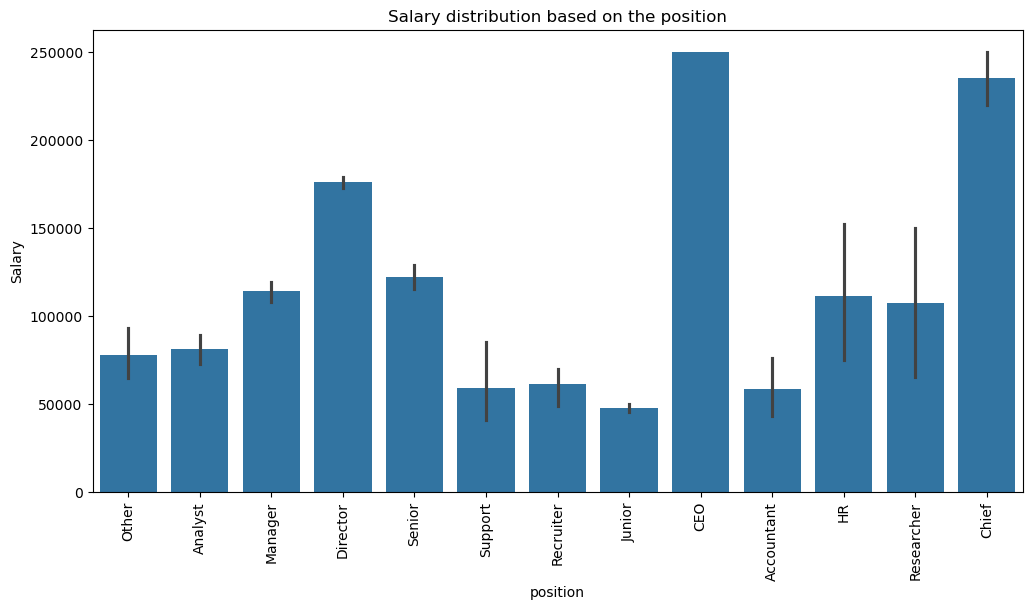

In [251]:
# let's visualize the salary distribution based on the position
df_conected = pd.concat([X, df], axis=1)
plt.figure(figsize=(12, 6))
sns.barplot(x='position', y='Salary', data=df_conected)
plt.xticks(rotation=90)
plt.title('Salary distribution based on the position')
plt.show()


In [272]:
# now we will encode the job title column
positions = ["CEO", "Chief", 'Director',  'Senior' , "Researcher", "HR", 'Manager', 'Junior',"Analyst",  "Accountant", "Other" ,"Recruiter", "Support"]
ordinal_encoder = OrdinalEncoder(categories=[positions])
X['position_rank'] = ordinal_encoder.fit_transform(X[['position']]).flatten()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [258]:
# Education Level column
X.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,position,position_rank
133,47.0,Male,PhD,Senior Research Scientist,22.0,Senior,11.0
85,Other,Other,Other,Other,Other,Other,8.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,Analyst,1.0
258,50.0,Female,PhD,Director of Operations,22.0,Director,4.0
237,45.0,Male,Master's,Senior Software Developer,16.0,Senior,11.0
317,36.0,Male,Bachelor's,Senior Marketing Specialist,8.0,Senior,11.0
187,34.0,Male,Bachelor's,Senior Quality Assurance Analyst,9.0,Analyst,1.0
196,41.0,Female,Bachelor's,Senior Marketing Coordinator,11.0,Senior,11.0
300,48.0,Female,Master's,Director of HR,20.0,HR,5.0
294,45.0,Female,Master's,Senior HR Manager,14.0,Manager,7.0


In [20]:
# Years of Experience column


In [11]:
df.shape

(375, 6)

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.query("Salary <= 1000")

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
370,85000.0
371,170000.0
372,40000.0
373,90000.0


In [ ]:
X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.hist()

In [ ]:
df.query("Age >= 40")

<Axes: xlabel='Age', ylabel='Years of Experience'>

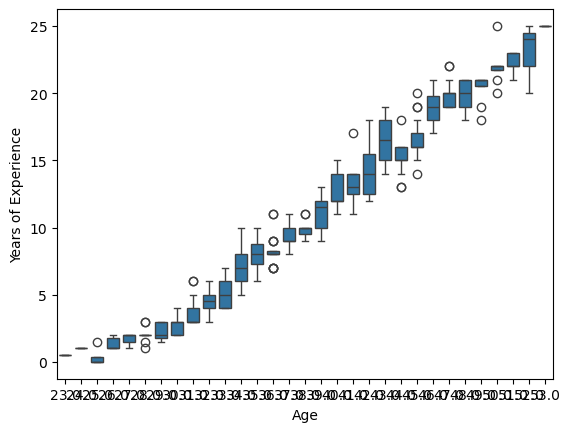

In [57]:
sns.boxplot(x='Age',y='Years of Experience', data=X)

In [ ]:
df['Job Title'].value_counts()

In [58]:
X_train["Job Title"].value_counts().head(30).plot(kind="barh")
plt.xlabel('Count')
plt.title('Top 30 Job In The Market')

NameError: name 'X_train' is not defined

In [ ]:
X_train.isnull().sum()

In [ ]:
X_train.drop(columns='Gender', inplace=)

In [ ]:
X_train.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline


num_pipe = Pipeline([('scaler', StandardScaler())])
cat_pipe = Pipeline([('encoder', OrdinalEncoder())])


In [ ]:
from sklearn.compose import ColumnTransformer
pipe = ColumnTransformer([])

In [ ]:
X_train.fit